## Environment Setup

In [99]:
import pandas as pd
import numpy as np
import scipy
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import load_breast_cancer
import timeit

## Data Extraction and Exploration

In [53]:
data = load_breast_cancer()

In [54]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [55]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [56]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [57]:
demo_cols = ['age', 'gender', 'physician_network', 'patient_covered', 'peer_referral']

In [58]:
df['age'] = pd.Series(np.random.randint(20,100,df.shape[0]))

In [59]:
for i in range(1,len(demo_cols)):
    df[demo_cols[i]] = pd.Series(np.random.randint(0,2,df.shape[0]))

In [60]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,age,gender,physician_network,patient_covered,peer_referral
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,0.254265,0.272188,0.114606,0.290076,0.083946,59.560633,0.513181,0.509666,0.497364,0.476274
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,0.157336,0.208624,0.065732,0.061867,0.018061,23.336944,0.500266,0.500346,0.500433,0.499876
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,0.027290,0.000000,0.000000,0.156500,0.055040,20.000000,0.000000,0.000000,0.000000,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,0.147200,0.114500,0.064930,0.250400,0.071460,38.000000,0.000000,0.000000,0.000000,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,0.211900,0.226700,0.099930,0.282200,0.080040,61.000000,1.000000,1.000000,0.000000,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,0.339100,0.382900,0.161400,0.317900,0.092080,80.000000,1.000000,1.000000,1.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,1.058000,1.252000,0.291000,0.663800,0.207500,99.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(df)

## Unsupervised learning with K-means++

In [91]:
n_samples, n_features = X_scaled.shape
print('Number of samples:')
print(n_samples)
print('Number of features:')
print(n_features)
# assume there are 10 segmentations
n_groups = 10
print('Number of groups:')
print(n_groups)

Number of samples:
569
Number of features:
35
Number of groups:
10


In [92]:
clf = cluster.KMeans(init='k-means++', n_clusters=n_groups, max_iter = 1000, random_state= 1)
clf.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [93]:
len(clf.cluster_centers_)

10

In [94]:
clf.labels_

array([0, 6, 0, 0, 6, 8, 9, 5, 7, 6, 1, 1, 8, 3, 9, 9, 7, 0, 6, 3, 5, 7,
       5, 8, 0, 6, 6, 9, 6, 7, 7, 0, 6, 7, 8, 9, 8, 7, 8, 2, 4, 2, 0, 8,
       8, 0, 2, 7, 5, 9, 9, 4, 7, 5, 7, 1, 0, 9, 7, 3, 1, 1, 8, 1, 7, 8,
       3, 1, 8, 3, 0, 4, 6, 5, 1, 1, 2, 6, 0, 7, 5, 3, 6, 9, 2, 0, 1, 4,
       2, 5, 5, 9, 8, 7, 5, 0, 2, 3, 7, 4, 1, 1, 4, 7, 7, 8, 9, 1, 0, 9,
       3, 1, 9, 9, 1, 9, 2, 9, 6, 8, 9, 5, 0, 7, 2, 1, 1, 8, 8, 6, 4, 7,
       4, 9, 9, 1, 8, 8, 4, 7, 2, 5, 5, 4, 8, 9, 1, 9, 4, 2, 7, 1, 9, 8,
       1, 5, 0, 7, 1, 3, 5, 0, 6, 4, 6, 4, 4, 2, 0, 9, 5, 1, 8, 2, 3, 8,
       1, 9, 2, 5, 0, 0, 4, 1, 7, 5, 3, 4, 3, 3, 5, 7, 9, 5, 2, 3, 8, 3,
       6, 5, 2, 3, 6, 6, 4, 5, 2, 2, 8, 7, 7, 3, 6, 9, 2, 2, 8, 7, 6, 8,
       2, 8, 7, 8, 7, 8, 3, 3, 2, 8, 4, 8, 9, 5, 3, 7, 0, 4, 1, 8, 9, 3,
       7, 1, 7, 1, 4, 3, 8, 3, 6, 7, 0, 0, 0, 4, 6, 0, 0, 9, 6, 8, 4, 9,
       9, 6, 8, 5, 1, 9, 2, 9, 6, 1, 3, 9, 4, 9, 5, 2, 6, 8, 9, 8, 7, 4,
       9, 5, 5, 9, 9, 9, 2, 5, 7, 4, 3, 2, 4, 2, 6,

In [95]:
clf_param = pd.DataFrame(clf.cluster_centers_, columns=[df.columns.values])

In [96]:
clf_param

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,age,gender,physician_network,patient_covered,peer_referral
0,0.550276,0.391228,0.556567,0.406842,0.508870,0.521929,0.506424,0.562312,0.525996,0.347983,...,0.435917,0.454912,0.749570,0.389124,0.289857,0.522504,9.722222e-01,6.944444e-01,8.333333e-02,6.944444e-01
1,0.253420,0.329648,0.246760,0.143905,0.368957,0.198575,0.131438,0.147910,0.371361,0.267871,...,0.167351,0.158257,0.290117,0.259552,0.165470,0.514837,1.000000e+00,7.771561e-16,6.106227e-16,4.098361e-01
2,0.263544,0.268659,0.256774,0.151040,0.388789,0.211363,0.134728,0.167696,0.367059,0.282934,...,0.176860,0.164746,0.318461,0.248870,0.174258,0.552039,-2.220446e-16,1.000000e+00,1.000000e+00,5.370370e-01
3,0.259360,0.278150,0.251016,0.148339,0.334802,0.180592,0.113252,0.128481,0.334867,0.250008,...,0.162748,0.149838,0.267709,0.236149,0.166074,0.491139,1.000000e+00,1.000000e+00,5.551115e-16,4.545455e-01
4,0.307045,0.314482,0.297995,0.186996,0.366735,0.199745,0.137591,0.178332,0.347659,0.235804,...,0.162716,0.154545,0.327071,0.235383,0.148899,0.463729,5.384615e-01,6.661338e-16,1.000000e+00,1.000000e+00
5,0.317543,0.282241,0.309981,0.191857,0.384304,0.230925,0.157547,0.198755,0.362670,0.253867,...,0.194149,0.175831,0.340411,0.242630,0.169694,0.489088,5.172414e-01,7.771561e-16,1.000000e+00,-6.661338e-16
6,0.620756,0.423314,0.622895,0.487582,0.473262,0.454151,0.498431,0.572930,0.460562,0.263388,...,0.382458,0.424239,0.725788,0.323477,0.257062,0.507980,2.391304e-01,4.565217e-01,9.565217e-01,4.130435e-01
7,0.310541,0.312334,0.303604,0.190071,0.386908,0.229234,0.165799,0.198662,0.358329,0.254072,...,0.196066,0.192786,0.353169,0.243946,0.170794,0.478602,-2.220446e-16,1.000000e+00,6.661338e-16,3.968254e-01
8,0.328779,0.334846,0.323885,0.206109,0.407880,0.266127,0.209166,0.247796,0.378781,0.283798,...,0.227639,0.222070,0.398962,0.268165,0.203828,0.525141,1.110223e-16,4.440892e-16,3.885781e-16,5.000000e-01
9,0.312622,0.338279,0.307012,0.188801,0.382300,0.246650,0.193145,0.214503,0.361413,0.283438,...,0.206120,0.203476,0.366351,0.245617,0.193919,0.473453,1.000000e+00,1.000000e+00,1.000000e+00,4.861111e-01


In [97]:
df['segmentation'] = pd.Series(clf.labels_)

## Supervised learning to identify key drivers of patient engagement

In [119]:
print('percent of patients with malignant tumor')
data.target.mean()

percent of patients with malignant tumor


0.6274165202108963

In [118]:
# assume 60% of malignant patients participated in trial
# generate random int from 1 to 10 and multiply the target label, 
# if result > 4 then the patient is assumed to participate
y_df =  pd.DataFrame(data = {'random':np.random.randint(1,11,df.shape[0]),'tumor_label':data.target})
y_df['label'] = y_df['random'] * y_df['tumor_label']
y_df['y'] = y_df['label'].apply(lambda x: 1 if x > 4 else 0)
y = y_df['y']
print("percent of patients participated in trial")
y.mean()

percent of patients participated in trial


0.37082601054481545

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [121]:
# Before applying random forest model to predict, 
# since the Random Forest model's optimal parameter has not been searched, 
# I will use GridSearchCV to find the best parameter
start = timeit.default_timer()

# set the parameter grid for max_depth
param_grid = {'n_estimators': np.arange(10,101,10),'max_depth': np.arange(3,10)}
clf_rdmforest = GridSearchCV(RandomForestClassifier(),param_grid)
clf_rdmforest.fit(X_train, y_train)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 12.932


In [129]:
print("best parameters for random forest")
print(clf_rdmforest.best_params_)
print("best model's accuracy")
print(clf_rdmforest.best_score_)

best parameters for random forest
{'max_depth': 5, 'n_estimators': 40}
best model's accuracy
0.7296587926509186


In [131]:
# refit model to get feature importance
clf_refit = RandomForestClassifier(n_estimators=40, max_depth=5)
clf_refit.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [137]:
clf_refit.feature_importances_

array([0.02350423, 0.01744288, 0.04471205, 0.0251544 , 0.00964788,
       0.01672092, 0.04536902, 0.15198751, 0.01362035, 0.00666027,
       0.01736663, 0.01382925, 0.0393177 , 0.0488629 , 0.00822327,
       0.01101403, 0.02416928, 0.03174618, 0.02265605, 0.02206601,
       0.07841972, 0.02248717, 0.06602665, 0.02680278, 0.01155432,
       0.02575088, 0.02558453, 0.09546475, 0.03022775, 0.00945173,
       0.01161767, 0.        , 0.        , 0.00045238, 0.00153867,
       0.00055014])

In [138]:
# create a dataframe to display comparison
importance = {'feature':df.columns.values,'feature importance': clf_refit.feature_importances_}
df_importance = pd.DataFrame(data = importance)
df_importance.set_index('feature', inplace = True)

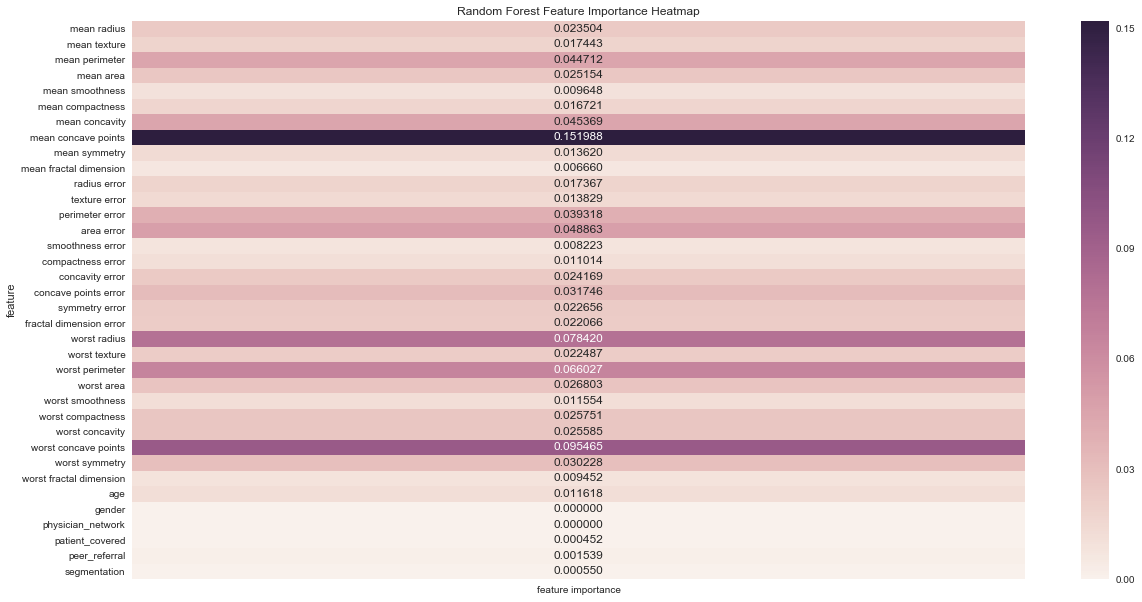

In [140]:
# display the result
plt.clf()
plt.figure(figsize=(20,10))
fig = sns.heatmap(df_importance, annot=True, fmt='f')
plt.subplots_adjust(top=0.9)
fig.set_title('Random Forest Feature Importance Heatmap')

plt.show()

In [145]:
probas_ = clf_refit.predict_proba(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

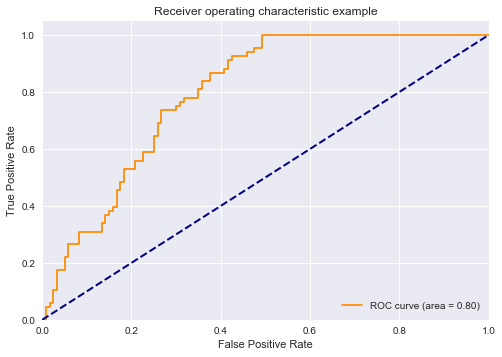

In [151]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Inclusion / exclusion criteria soft margin analysis

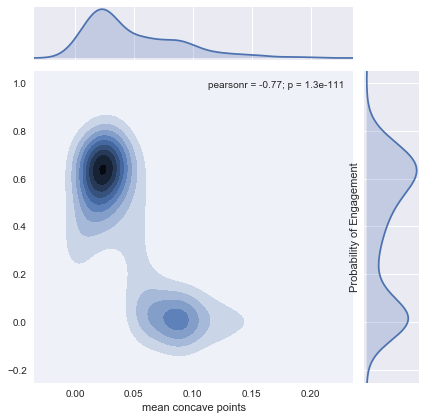

In [162]:
proba_all = clf_refit.predict_proba(df)
fig2 = sns.jointplot(df['mean concave points'], proba_all[:,1], kind = 'kde')
plt.ylabel("Probability of Engagement")
plt.show()

In [165]:
fig2.savefig('mean concave points soft margin graph.png')

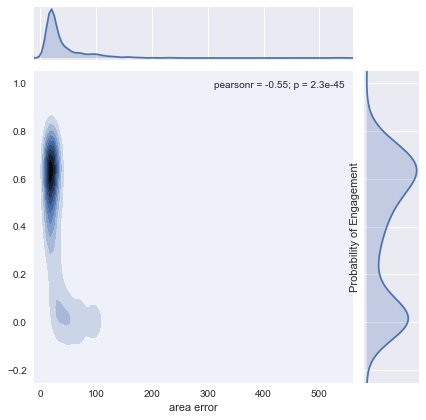

In [170]:
fig3 = sns.jointplot(df['area error'], proba_all[:,1], kind = 'kde')
plt.ylabel("Probability of Engagement")
plt.show()
fig3.savefig('area error soft margin graph.png')